In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/Downloads/Copy of Medical Inventory Optimaization Dataset.csv'  # replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())



First few rows of the dataset:
  Typeofsales   Patient_ID    Specialisation         Dept  Dateofbill  \
0        Sale  12018098765   Specialisation6  Department1    6-1-2022   
1        Sale  12018103897   Specialisation7  Department1   7/23/2022   
2        Sale  12018101123   Specialisation2  Department3   6/23/2022   
3        Sale  12018079281  Specialisation40  Department1   3/17/2022   
4        Sale  12018117928   Specialisation5  Department1  12/21/2022   

   Quantity  ReturnQuantity  Final_Cost  Final_Sales  RtnMRP Formulation  \
0         1               0      55.406       59.260     0.0       Form1   
1         1               0     768.638      950.800     0.0       Form1   
2         1               0     774.266     4004.214     0.0       Form2   
3         2               0      40.798       81.044     0.0       Form1   
4         1               0      40.434       40.504     0.0       Form1   

                            DrugName              SubCat  \
0          ZI

In [28]:
# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())




Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Typeofsales     14218 non-null  object 
 1   Patient_ID      14218 non-null  int64  
 2   Specialisation  14218 non-null  object 
 3   Dept            14218 non-null  object 
 4   Dateofbill      14218 non-null  object 
 5   Quantity        14218 non-null  int64  
 6   ReturnQuantity  14218 non-null  int64  
 7   Final_Cost      14218 non-null  float64
 8   Final_Sales     14218 non-null  float64
 9   RtnMRP          14218 non-null  float64
 10  Formulation     13565 non-null  object 
 11  DrugName        12550 non-null  object 
 12  SubCat          12550 non-null  object 
 13  SubCat1         12526 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.5+ MB
None


In [29]:
# Display summary statistics
print("\nSummary statistics:")
print(data.describe())




Summary statistics:
         Patient_ID      Quantity  ReturnQuantity    Final_Cost   Final_Sales  \
count  1.421800e+04  14218.000000    14218.000000  14218.000000  14218.000000   
mean   1.201809e+10      2.231748        0.291954    124.823957    234.038300   
std    2.810229e+04      5.132043        1.643322    464.782794    671.261572   
min    1.201800e+10      0.000000        0.000000     40.000000      0.000000   
25%    1.201808e+10      1.000000        0.000000     44.928000     47.815000   
50%    1.201809e+10      1.000000        0.000000     53.650000     86.424000   
75%    1.201811e+10      2.000000        0.000000     77.800000    181.000000   
max    1.201813e+10    150.000000       50.000000  33178.000000  39490.000000   

             RtnMRP  
count  14218.000000  
mean      29.126755  
std      182.262335  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max     8014.000000  


In [30]:
# Measures of Central Tendency
print("\nMeasures of Central Tendency before cleaning:")
print("Mean:\n", data.mean(numeric_only=True))
print("Median:\n", data.median(numeric_only=True))
print("Mode:\n", data.mode().iloc[0])

# Measures of Dispersion
print("\nMeasures of Dispersion before cleaning:")
print("Variance:\n", data.var(numeric_only=True))
print("Standard Deviation:\n", data.std(numeric_only=True))
print("Range:\n", data.max(numeric_only=True) - data.min(numeric_only=True))

# Skewness and Kurtosis
print("\nSkewness before cleaning:\n", data.skew(numeric_only=True))
print("\nKurtosis before cleaning:\n", data.kurt(numeric_only=True))




Measures of Central Tendency before cleaning:
Mean:
 Patient_ID        1.201809e+10
Quantity          2.231748e+00
ReturnQuantity    2.919539e-01
Final_Cost        1.248240e+02
Final_Sales       2.340383e+02
RtnMRP            2.912675e+01
dtype: float64
Median:
 Patient_ID        1.201809e+10
Quantity          1.000000e+00
ReturnQuantity    0.000000e+00
Final_Cost        5.365000e+01
Final_Sales       8.642400e+01
RtnMRP            0.000000e+00
dtype: float64
Mode:
 Typeofsales                                        Sale
Patient_ID                                12018071649.0
Specialisation                          Specialisation4
Dept                                        Department1
Dateofbill                                     7-7-2022
Quantity                                            1.0
ReturnQuantity                                      0.0
Final_Cost                                       49.352
Final_Sales                                         0.0
RtnMRP                  

In [31]:
# Handling missing values by dropping rows with missing values
data_cleaned = data.dropna()

print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())

# Convert date columns to datetime
date_columns = data_cleaned.select_dtypes(include=['object']).apply(pd.to_datetime, errors='ignore').select_dtypes(include=['datetime']).columns
for column in date_columns:
    data_cleaned[column] = pd.to_datetime(data_cleaned[column])

# Display basic statistics of cleaned data
print("\nSummary statistics of cleaned data:")
print(data_cleaned.describe())




Missing values after cleaning:
Typeofsales       0
Patient_ID        0
Specialisation    0
Dept              0
Dateofbill        0
Quantity          0
ReturnQuantity    0
Final_Cost        0
Final_Sales       0
RtnMRP            0
Formulation       0
DrugName          0
SubCat            0
SubCat1           0
dtype: int64

Summary statistics of cleaned data:
         Patient_ID      Quantity  ReturnQuantity    Final_Cost   Final_Sales  \
count  1.203700e+04  12037.000000    12037.000000  12037.000000  12037.000000   
mean   1.201809e+10      1.922904        0.192905    133.586433    238.587937   
std    2.817368e+04      3.572569        0.831124    500.368301    702.536463   
min    1.201800e+10      0.000000        0.000000     40.000000      0.000000   
25%    1.201808e+10      1.000000        0.000000     44.928000     47.860000   
50%    1.201809e+10      1.000000        0.000000     54.292000     87.800000   
75%    1.201811e+10      2.000000        0.000000     83.680000    181.

C:\Users\SHARON\AppData\Local\Temp\ipykernel_9380\3940122175.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  date_columns = data_cleaned.select_dtypes(include=['object']).apply(pd.to_datetime, errors='ignore').select_dtypes(include=['datetime']).columns
C:\Users\SHARON\AppData\Local\Temp\ipykernel_9380\3940122175.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_columns = data_cleaned.select_dtypes(include=['object']).apply(pd.to_datetime, errors='ignore').select_dtypes(include=['datetime']).columns
C:\Users\SHARON\AppData\Local\Temp\ipykernel_9380\3940122175.py:8: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly inste

In [32]:
# Measures of Central Tendency after cleaning
print("\nMeasures of Central Tendency after cleaning:")
print("Mean:\n", data_cleaned.mean(numeric_only=True))
print("Median:\n", data_cleaned.median(numeric_only=True))
print("Mode:\n", data_cleaned.mode().iloc[0])

# Measures of Dispersion after cleaning
print("\nMeasures of Dispersion after cleaning:")
print("Variance:\n", data_cleaned.var(numeric_only=True))
print("Standard Deviation:\n", data_cleaned.std(numeric_only=True))
print("Range:\n", data_cleaned.max(numeric_only=True) - data_cleaned.min(numeric_only=True))

# Skewness and Kurtosis after cleaning
print("\nSkewness after cleaning:\n", data_cleaned.skew(numeric_only=True))
print("\nKurtosis after cleaning:\n", data_cleaned.kurt(numeric_only=True))




Measures of Central Tendency after cleaning:
Mean:
 Patient_ID        1.201809e+10
Quantity          1.922904e+00
ReturnQuantity    1.929052e-01
Final_Cost        1.335864e+02
Final_Sales       2.385879e+02
RtnMRP            2.026729e+01
dtype: float64
Median:
 Patient_ID        1.201809e+10
Quantity          1.000000e+00
ReturnQuantity    0.000000e+00
Final_Cost        5.429200e+01
Final_Sales       8.780000e+01
RtnMRP            0.000000e+00
dtype: float64
Mode:
 Typeofsales                                        Sale
Patient_ID                                  12018085615
Specialisation                          Specialisation4
Dept                                        Department1
Dateofbill                                     7-9-2022
Quantity                                              1
ReturnQuantity                                        0
Final_Cost                                       42.464
Final_Sales                                         0.0
RtnMRP                   

In [33]:
# Calculate correlation matrix using only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
correlation_matrix = data_cleaned[numeric_columns].corr()

print("\nCorrelation matrix:")
print(correlation_matrix)





Correlation matrix:
                Patient_ID  Quantity  ReturnQuantity  Final_Cost  Final_Sales  \
Patient_ID        1.000000  0.012686       -0.001807    0.001218    -0.002793   
Quantity          0.012686  1.000000       -0.124937    0.034782     0.271688   
ReturnQuantity   -0.001807 -0.124937        1.000000   -0.003435    -0.078830   
Final_Cost        0.001218  0.034782       -0.003435    1.000000     0.901628   
Final_Sales      -0.002793  0.271688       -0.078830    0.901628     1.000000   
RtnMRP            0.000007 -0.071575        0.450740    0.139235    -0.045161   

                  RtnMRP  
Patient_ID      0.000007  
Quantity       -0.071575  
ReturnQuantity  0.450740  
Final_Cost      0.139235  
Final_Sales    -0.045161  
RtnMRP          1.000000  


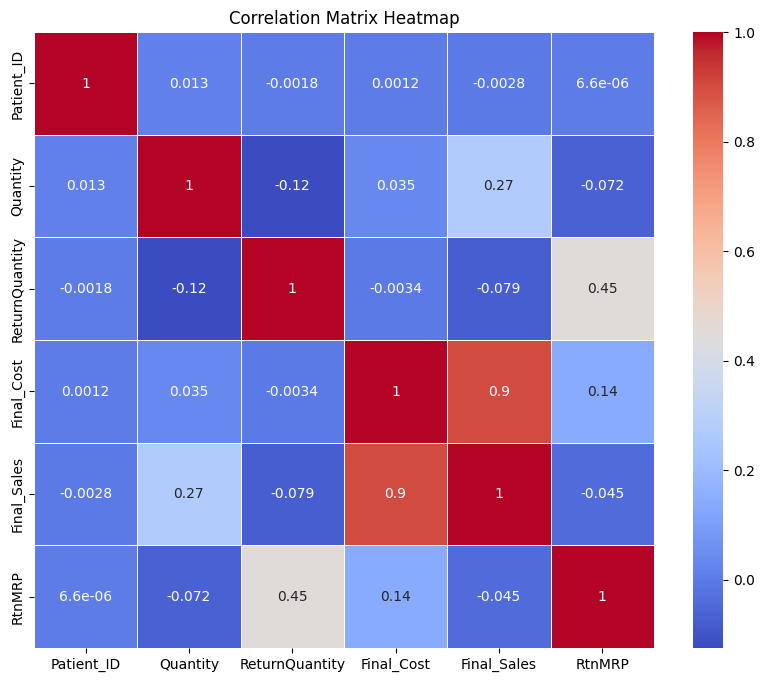

In [34]:
# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



<Figure size 2000x1000 with 0 Axes>

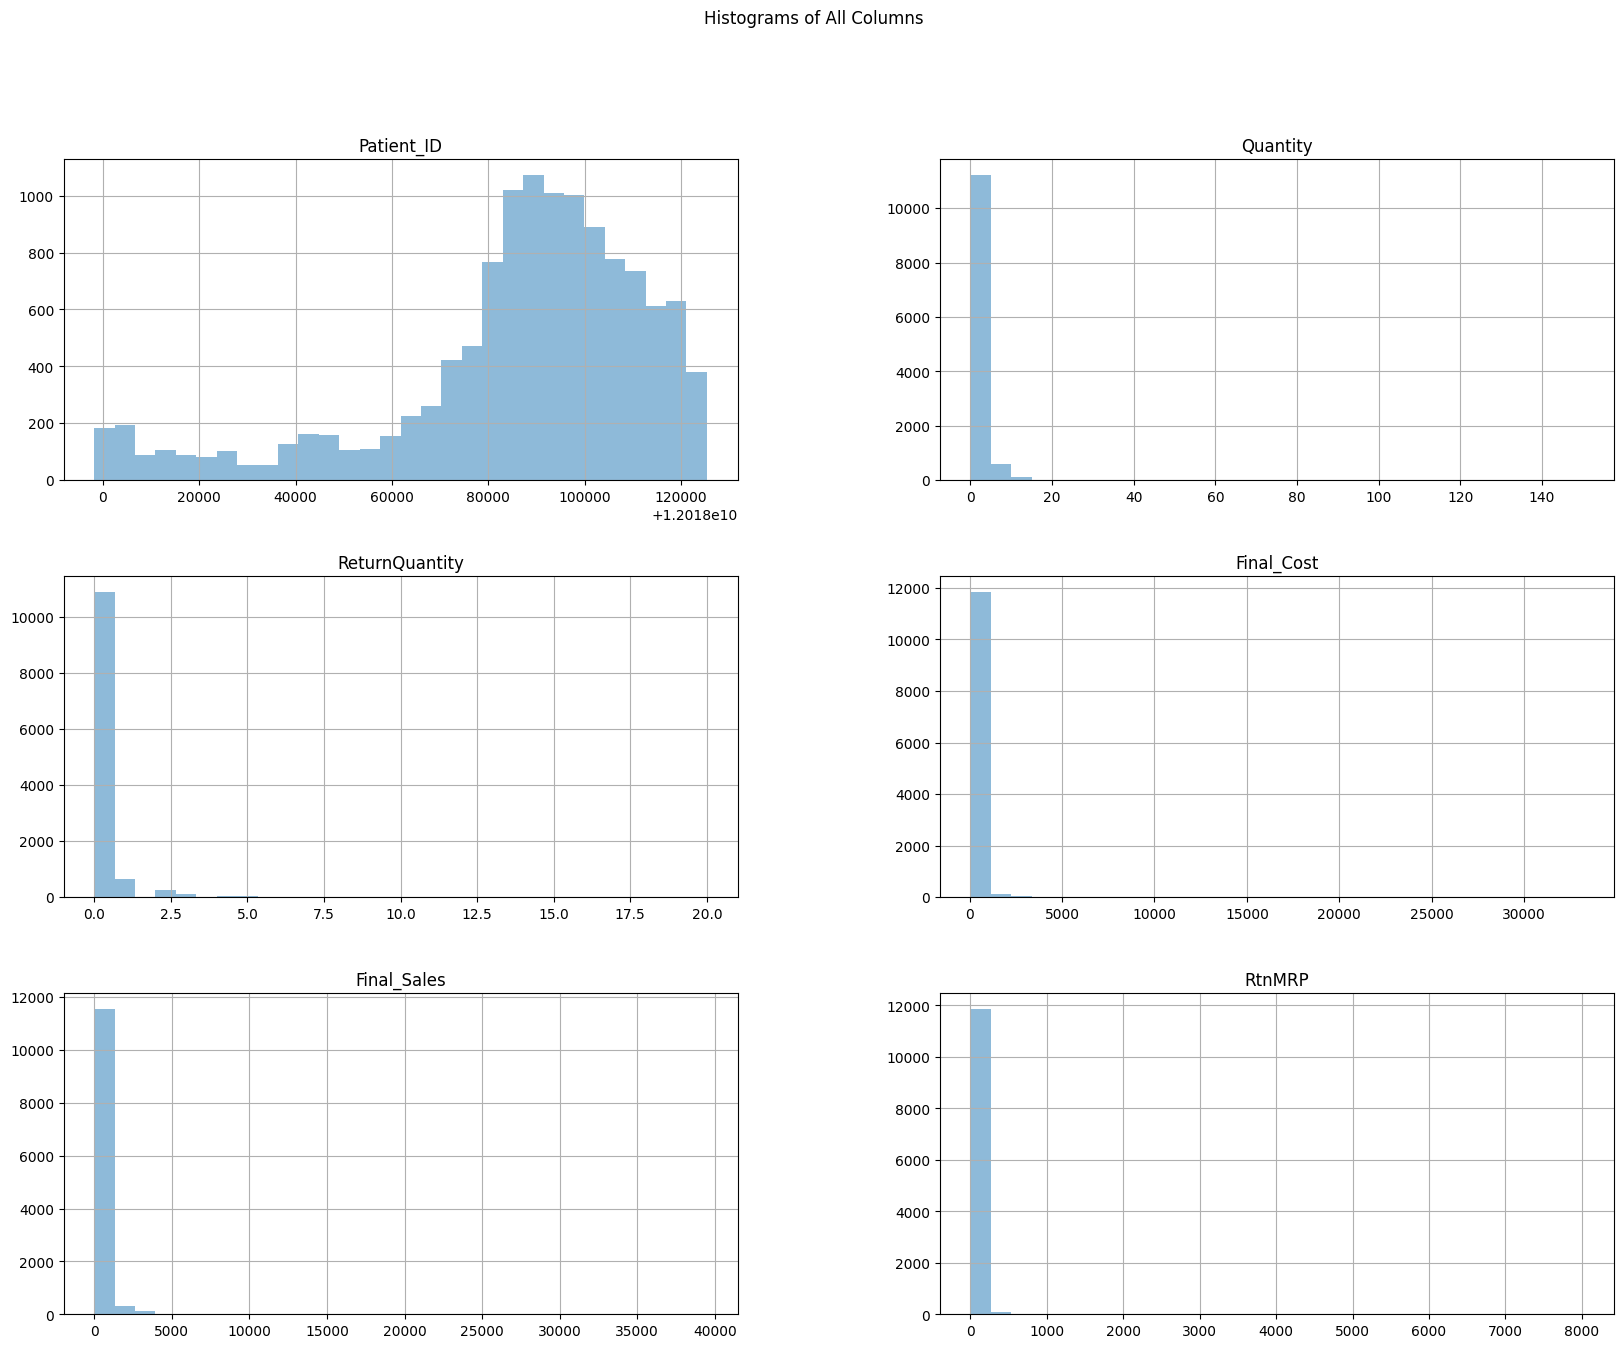

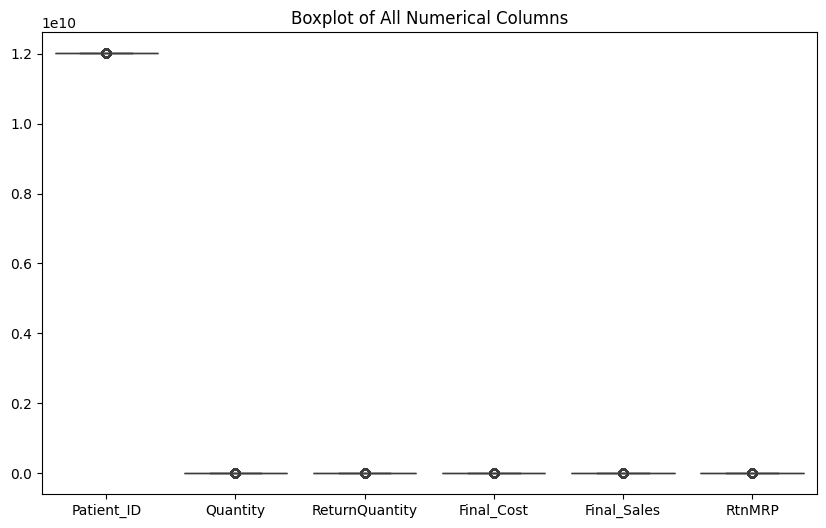

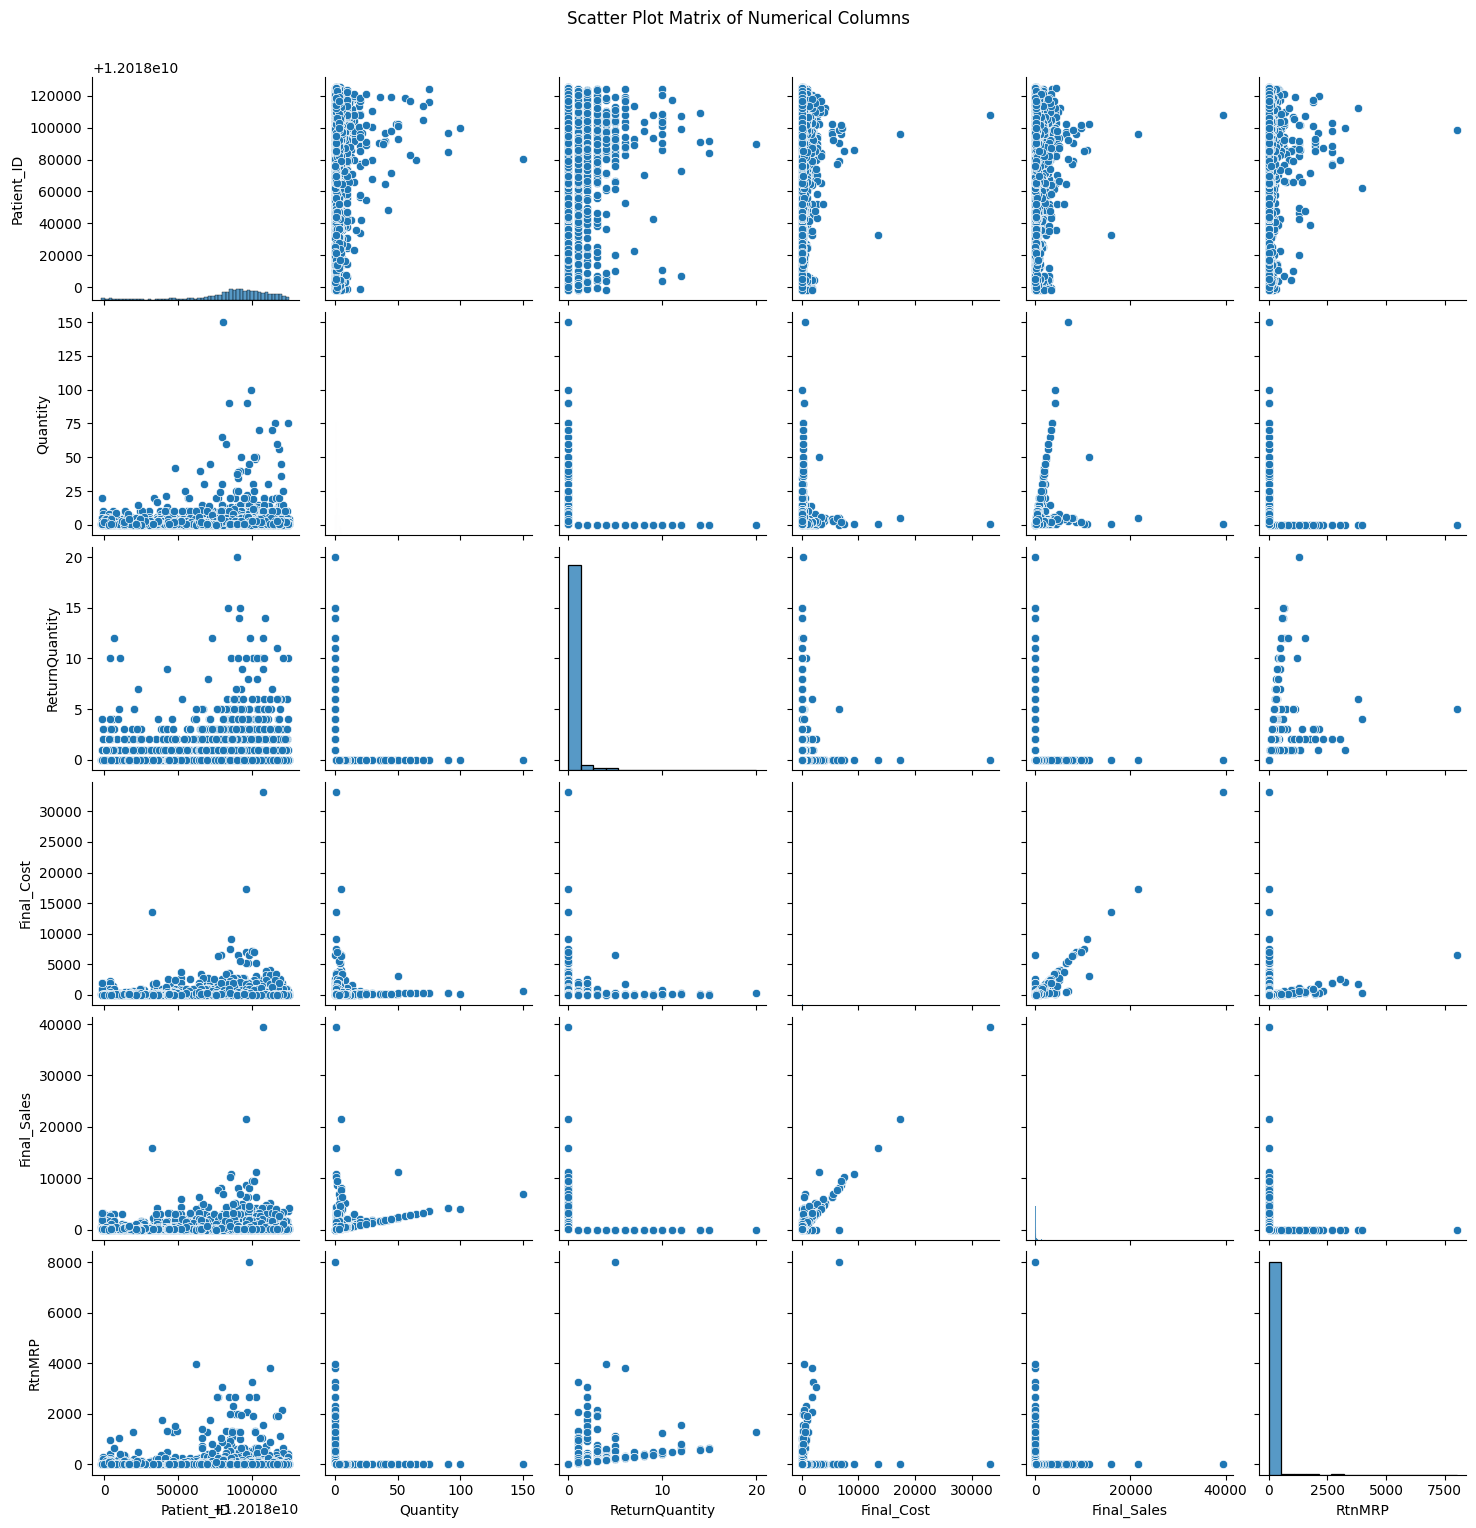

In [35]:
# Data Visualization
# Histograms
plt.figure(figsize=(20, 10))
data_cleaned.hist(bins=30, alpha=0.5, figsize=(20, 15))
plt.suptitle('Histograms of All Columns')
plt.show()

# Boxplot for each numerical column
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned.select_dtypes(include=np.number))
plt.title('Boxplot of All Numerical Columns')
plt.show()

# Scatter plot matrix
sns.pairplot(data_cleaned.select_dtypes(include=np.number))
plt.suptitle('Scatter Plot Matrix of Numerical Columns', y=1.02)
plt.show()


